# Optimización de Gastos de Marketing en Y.Afisha

De acuerdo a los registros detallados de todas las visitas a Y.Afisha entre enero de 2017 y diciembre de 2018, un archivo con todos los pedidos que se hicieron en ese período y las estadísticas precisas sobre los gastos de marketing, vamos a investigar un poco: cómo es que la gente usa el servicio, cuándo deciden dar el paso y realizar una compra, cuánto aporta cada cliente y, lo más importante, cuándo los ingresos superan lo que se invertió en captar nuevos clientes.

¿Cómo lo haremos? Bueno, con algunas técnicas de análisis de datos en Python. La idea es obtener insights valiosos para el equipo de marketing de Y.Afisha, para que se pueda maximizar el retorno de inversión y asegurarnos de que se esta en el camino correcto para el éxito a largo plazo.

## Preparación de los datos para el análisis.

### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Cargar datos

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/visits_log_us.csv'

### Optimizar datos

#### Tabla visits (registros del servidor con datos sobre las visitas al sitio web)

In [ ]:
visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [ ]:
visits.columns = ['device','end_ts','source_id','start_ts','uid']

In [ ]:
visits['device'] = visits['device'].astype('category')
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [ ]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


#### Tabla orders (datos sobre pedidos)

In [ ]:
orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [ ]:
orders.columns = ['buy_ts','revenue','uid']

In [ ]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [ ]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


#### Tabla costs (datos sobre gastos de marketing)

In [ ]:
costs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [ ]:
costs['dt'] = pd.to_datetime(costs['dt'])

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [ ]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


En este primer paso se optimizaron los datos... 

## Informes y métricas.

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

In [ ]:
visits['activity_day']  = visits['start_ts'].dt.date
visits['activity_week'] = visits['start_ts'].astype('datetime64[W]')
visits['activity_month']  = visits['start_ts'].astype('datetime64[M]')

dau_total = visits.groupby('activity_day')['uid'].nunique().mean()
wau_total = visits.groupby('activity_week')['uid'].nunique().mean()
mau_total = visits.groupby('activity_month')['uid'].nunique().mean()

print("Usuarios activos por día:", round(dau_total, 0))
print("Usuarios activos por semana:", round(wau_total, 0))
print("Usuarios activos por mes:", round(mau_total, 0))

Usuarios activos por día: 908.0
Usuarios activos por semana: 5724.0
Usuarios activos por mes: 23228.0


#### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

In [ ]:
sessions_per_day = visits.groupby('activity_day')['uid'].count().mean()

print("Sesiones por día:", round(sessions_per_day, 0))

Sesiones por día: 987.0


#### ¿Cuál es la duración de cada sesión?

In [ ]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print("Duración de cada sesión:", visits['session_duration'].mode()[0], 's')


Duración de cada sesión: 60 s


#### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [ ]:
sticky_wau = dau_total / wau_total * 100
print('"Sticky Factor" para la audiencia semanal:', round(sticky_wau, 2), '%')
sticky_mau = dau_total / mau_total * 100
print('"Sticky Factor" para la audiencia mensual:', round(sticky_mau, 2), '%')

"Sticky Factor" para la audiencia semanal: 15.86 %
"Sticky Factor" para la audiencia mensual: 3.91 %


Durante esta fase inicial del proyecto de análisis de negocio, hemos obtenido una visión significativa sobre la actividad y el compromiso de los usuarios en la plataforma.
- Observamos un promedio de aproximadamente 908 usuarios activos por día, 5724 por semana y 23228 por mes. Esto indica una base sólida de usuarios comprometidos con nuestra plataforma a lo largo del tiempo.
- Encontramos alrededor de 987 sesiones por día en promedio. Esto resalta la actividad frecuente de nuestros usuarios, quienes participan en múltiples sesiones durante el curso de un día.
- Encontramos que el reetorno para la audiencia semanal es del 15.59%, mientras que para la audiencia mensual es del 3.91%. Estos números revelan la proporción de usuarios que regresan regularmente, lo que indica un nivel saludable de retención y compromiso a largo plazo.

Estas métricas proporcionan una base sólida para comprender el comportamiento de los usuarios en nuestra plataforma y nos brindan información valiosa para futuras estrategias de marketing y desarrollo de productos.

### Ventas

#### ¿Cuándo la gente empieza a comprar?

In [ ]:
first_purchase_date = orders.groupby('uid')['buy_ts'].min()
registration_date = visits.groupby('uid')['start_ts'].min()

time_to_conversion = first_purchase_date - registration_date
time_to_conversion_days = time_to_conversion.dt.days

conversion_intervals = pd.cut(time_to_conversion_days, bins=[-np.inf, 0, 1, 7, 14, 30, np.inf], labels=['Conversion 0d', 'Conversion 1d', 'Conversion 1w', 'Conversion 2w', 'Conversion 1m', 'Conversion >1m'])
conversion_counts = conversion_intervals.value_counts().sort_index()

percent= conversion_counts/conversion_counts.sum() * 100
print(round(percent, 2), '%')

Conversion 0d     72.18
Conversion 1d      2.77
Conversion 1w      5.66
Conversion 2w      2.54
Conversion 1m      3.42
Conversion >1m    13.42
dtype: float64 %


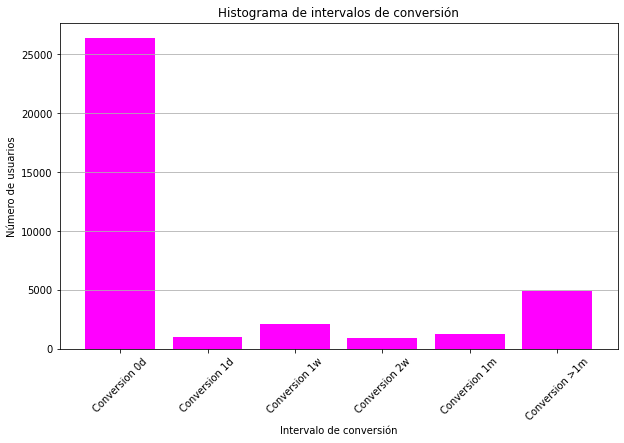

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(conversion_counts.index, conversion_counts.values, color='fuchsia')
plt.title('Histograma de intervalos de conversión')
plt.xlabel('Intervalo de conversión')
plt.ylabel('Número de usuarios')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

Promedio de pedidos por dia: 138.5


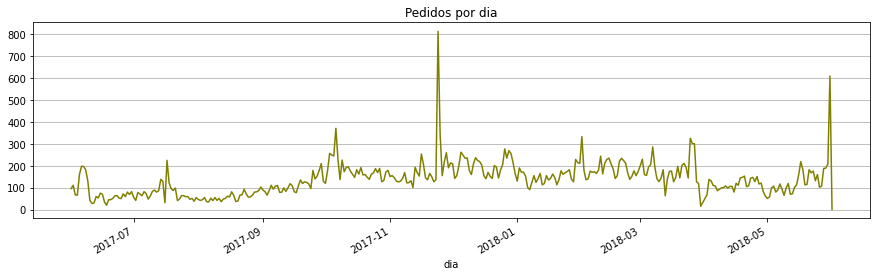

Promedio de pedidos por semana: 951.23


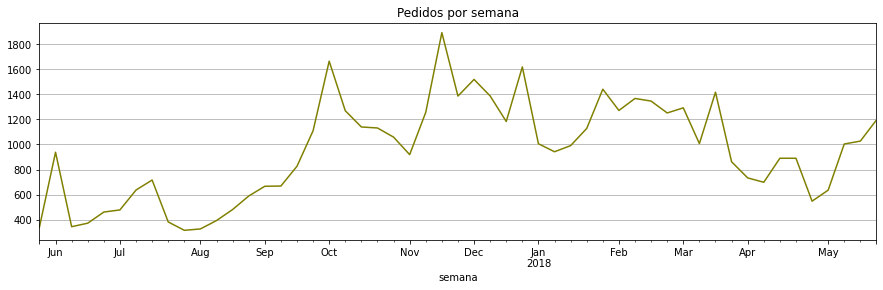

Promedio de pedidos por mes: 3878.08


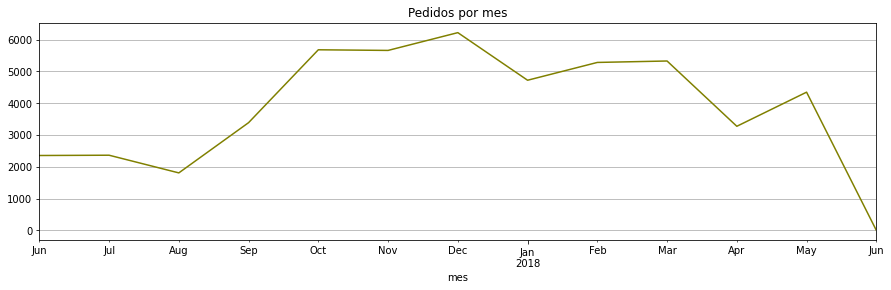

In [ ]:
orders['dia'] = orders['buy_ts'].dt.to_period('D').dt.to_timestamp()
orders['semana'] = orders['buy_ts'].dt.to_period('W').dt.to_timestamp()
orders['mes'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()

for periods in ['dia', 'semana', 'mes']:
  order_data = orders.groupby(periods)['uid'].count()
  print(f"Promedio de pedidos por {periods}: {round(order_data.mean(), 2)}")
  plt.title(f"Pedidos por {periods}")
  order_data.plot(figsize=(15, 4), color='olive')
  plt.grid(axis='y')
  plt.show()

#### ¿Cuál es el tamaño promedio de compra?

In [ ]:
avg_rev= orders['revenue'].mean()
print('El gasto promedio para cada compra es de: $', round(avg_rev, 4))

El gasto promedio para cada compra es de: $ 4.9996


#### ¿Cuánto dinero traen? (LTV)

Text(69.0, 0.5, 'Cohort (First Order Month)')

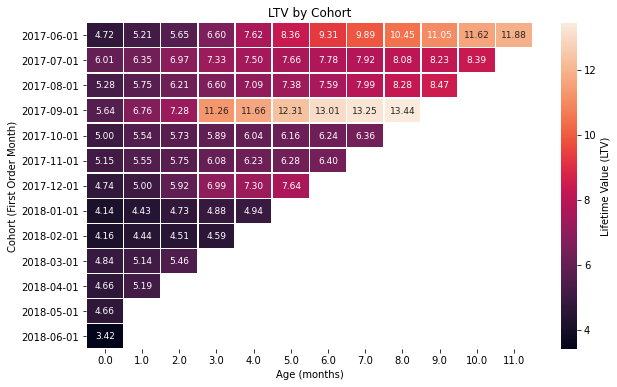

In [ ]:
# Encontrar la primera visita de cada usuario
first_visits = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_start_ts']

# Extraer la fecha y el mes de la primera sesión
first_visits['first_session_dt'] = first_visits['first_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_start_ts'].astype('datetime64[M]')

# Combinar los datos de las primeras visitas con los datos completos de visitas
visits_full = pd.merge(first_visits, visits, on='uid')

# Calcular la diferencia en meses entre la primera visita y las visitas subsiguientes
visits_full['age_months'] = ((visits_full['activity_month'] - visits_full['first_session_month']) / 
                             np.timedelta64(1, 'M')).round().astype('int')

# Encontrar la primera compra de cada usuario
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

# Crear un dataframe con las primeras órdenes y las primeras visitas
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

# Calcular los días hasta la primera compra
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_start_ts']) / 
                                    np.timedelta64(1, 'D')).astype('int')

# LTV
# Determinar el tamaño de cada cohorte de compradores
# Agrupa a los compradores por el mes de su primera compra y cuenta los usuarios únicos en cada grupo.
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
# Renombra la columna 'uid' a 'n_buyers' para indicar el número de compradores únicos.
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

# Fusionar las órdenes y compradores, y calcular ingresos por cohorte
# Une los DataFrames 'orders' y 'buyers' usando 'uid' como clave, y agrupa el resultado por mes de la primera orden y mes de orden.
# Calcula la suma de los ingresos para cada grupo.
cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'mes'])\
            .agg({'revenue': 'sum'}).reset_index()

# Fusionar las órdenes y compradores, y calcular ingresos por cohorte
# Une los DataFrames 'orders' y 'buyers' usando 'uid' como clave, y agrupa el resultado por mes de la primera orden y mes de orden.
# Calcula la suma de los ingresos para cada grupo.
cohorts = pd.merge(orders, buyers, how='inner', on='uid')\
            .groupby(['first_order_month', 'mes'])\
            .agg({'revenue': 'sum'}).reset_index()

# Calcular la antigüedad de las cohortes
# Calcula la 'edad' de cada cohorte desde su primera compra, en meses.
cohorts['age_month'] = ((cohorts['mes'] - cohorts['first_order_month']) / np.timedelta64(1, 'M')).round()
# Actualiza los nombres de las columnas para reflejar los datos que contienen.
cohorts.columns = ['first_order_month', 'mes', 'revenue', 'age_month']

# Crear el informe de cohortes y calcular el LTV
# Une 'cohort_sizes' con 'cohorts' usando 'first_order_month' como clave.
# Calcula el LTV dividiendo los ingresos por el número de compradores.
cohorts_report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
cohorts_report['ltv'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

# Preparar la tabla pivote para la visualización
# Crea una tabla pivote para visualizar el LTV de cada cohorte por su 'edad' en meses.
cohorts_ltv = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
# Redondea los valores a dos decimales y reemplaza los NaN por 0.
cohorts_ltv = cohorts_ltv.round(2)
# Convierte los índices de 'first_order_month' a cadena para mejorar la visualización en el heatmap.
cohorts_ltv.index = cohorts_ltv.index.astype(str)

# Visualización del Heatmap del LTV
# Visualiza el LTV de las cohortes usando un mapa de calor.
plt.figure(figsize=(10, 6))  # Aumenta el tamaño de la figura si es necesario
ax = sns.heatmap(cohorts_ltv, annot=True, fmt=".2f", linewidths=0.5,
                 cbar_kws={'label': 'Lifetime Value (LTV)'}, annot_kws={"size": 9})
plt.title('LTV by Cohort')
plt.xlabel('Age (months)')
plt.ylabel('Cohort (First Order Month)')

Utilizando el tiempo transcurrido entre el registro y la primera compra, hemos categorizado a los usuarios en diferentes intervalos de conversión, la mayoría de los usuarios, realizan su primera compra el mismo día en que se registran, lo que sugiere una alta tasa de conversión inmediata. Hemos analizado el número de pedidos realizados durante diferentes períodos de tiempo para tener una visión general del volumen de ventas a lo largo del tiempo.

En promedio, cada cliente genera $2.0 durante un año. El valor de vida útil del cliente (LTV) nos da una idea del valor total que cada cliente aporta a lo largo de su relación con la empresa durante un período de tiempo específico.Estos resultados nos proporcionan información valiosa sobre el comportamiento de los clientes, el rendimiento de las estrategias de marketing y las oportunidades para mejorar la retención de clientes y aumentar los ingresos a largo plazo.

### Marketing

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [ ]:
total_spent = costs['costs'].sum()
print("Total gastado: $", total_spent)

Total gastado: $ 329131.62


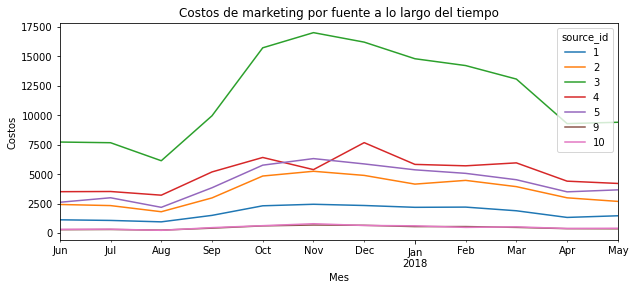

In [ ]:
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()

costs.pivot_table(
    index="month",
    columns="source_id",
    values="costs",
    aggfunc="sum"
).fillna(0).plot(kind="line", figsize=(10, 4))
plt.title("Costos de marketing por fuente a lo largo del tiempo")
plt.xlabel("Mes")
plt.ylabel("Costos")
plt.show()

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

CAC medio es: 9.01


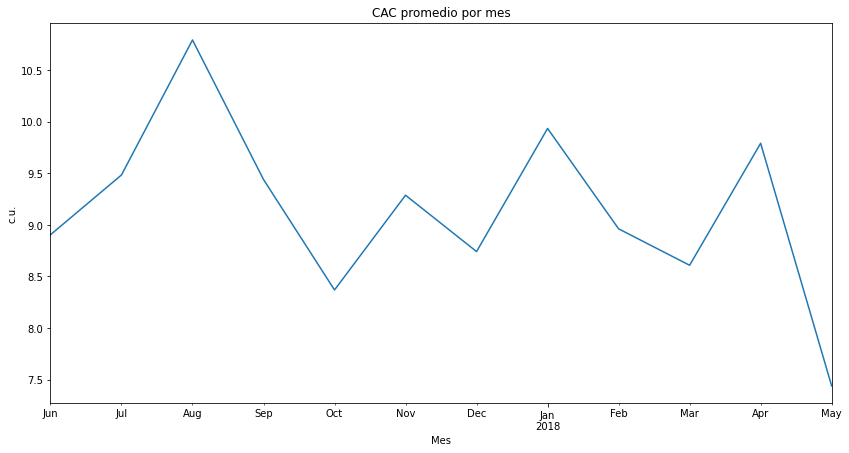

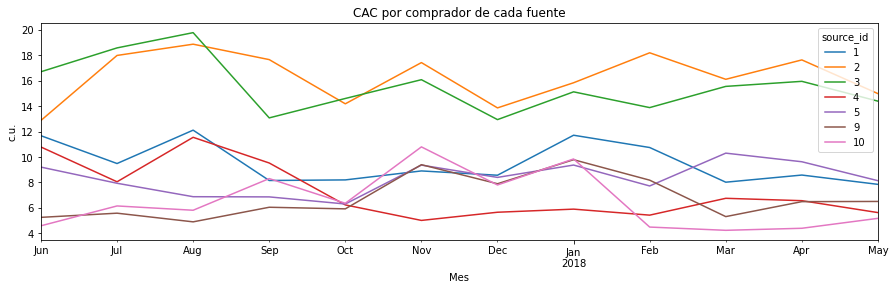

             cac
source_id       
1           9.49
2          16.29
3          15.58
4           7.27
5           8.34
9           6.84
10          6.56


In [ ]:
# Encontrar la primera visita de cada usuario (visits)
first_visits = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_start_ts']

# Extraer la fecha y el mes de la primera sesión
first_visits['first_session_dt'] = first_visits['first_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_start_ts'].astype('datetime64[M]')

# Combinar los datos de las primeras visitas con los datos completos de visitas
visits_full = pd.merge(first_visits, visits, on='uid')

# Calcular la diferencia en meses entre la primera visita y las visitas subsiguientes
visits_full['age_months'] = ((visits_full['activity_month'] - visits_full['first_session_month']) / 
                             np.timedelta64(1, 'M')).round().astype('int')

# Encontrar la primera compra de cada usuario (orders)
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

# Crear un dataframe con las primeras órdenes y las primeras visitas
buyers = pd.merge(first_visits, first_orders, on='uid')

# Calcular los días hasta la primera compra
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_start_ts']) / 
                                    np.timedelta64(1, 'D')).astype('int')

# Calcular el CAC medio
print("CAC medio es:", round(costs['costs'].sum() / orders['uid'].nunique(), 2))


costs['costs_month'] = costs['dt'].astype('datetime64[M]')
# Calcular el CAC por mes
CAC_by_month = pd.merge(costs.groupby('costs_month').agg({'costs': 'sum'}),
                        buyers.groupby('first_order_month').agg({'uid': 'nunique'}),
                        left_index=True, right_index=True)
CAC_by_month['cac'] = CAC_by_month['costs'] / CAC_by_month['uid']

# Gráfico del CAC promedio por mes
CAC_by_month['cac'].plot(figsize=(14, 7), title='CAC promedio por mes', xlabel='Mes', ylabel='c.u.')


# Encontrar la primera fuente por visitante
users = visits_full.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

# Calcular el CAC diario por fuente
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs'] / costs_['n_buyers']

# Gráfico de CAC diario por fuente y mes
costs_.pivot_table(index=['costs_month'], columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(15, 4), title='CAC por comprador de cada fuente', xlabel='Mes', ylabel='c.u.')
plt.show()

# Calcular el CAC promedio por fuente
cac_by_source = costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)
print(cac_by_source)

#### ¿Cuán rentables eran las inversiones? (ROMI)

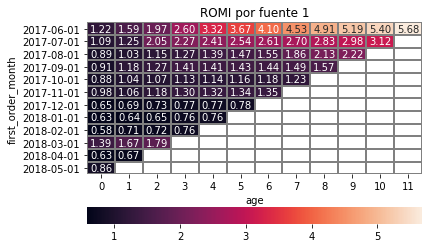

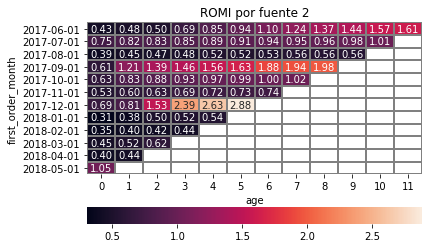

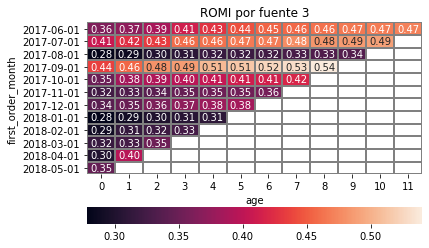

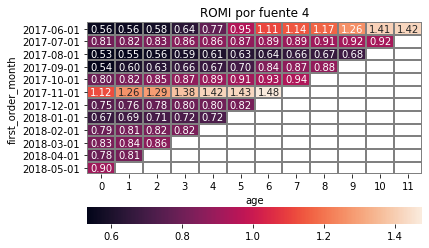

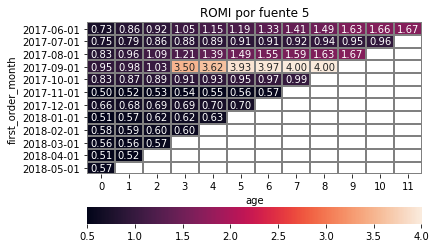

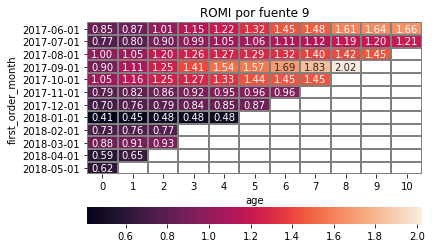

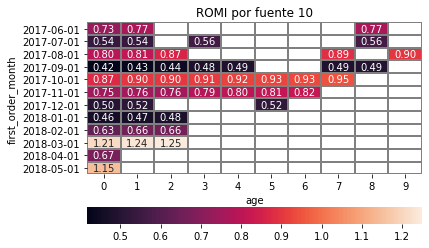

In [ ]:
# Calcular ingresos mensuales por usuario
month_revenue = orders.groupby(['uid', 'mes']).agg({'revenue': 'sum'}).reset_index()
buyers = buyers.merge(month_revenue, on='uid')

# Iterar a través de cada fuente de tráfico, excepto la fuente número 7
for source, df in buyers.groupby('source_id'):
    if source != 7:
        # Calcular el tamaño de la cohorte para cada fuente y mes de la primera orden
        cohort_sizes_t = (
            df.groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'})
            .reset_index()
        )
        cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

        # Calcular los ingresos totales por cohorte
        cohorts_revenue_t = (
            df.groupby(['source_id', 'first_order_month', 'mes'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )
        cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'mes', 'gp']

        # Fusionar los tamaños de las cohortes con los ingresos por cohortes
        report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
        report_romi['age'] = (
            report_romi['mes'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')
        report_romi['age'] = report_romi['age'].round().astype('int')
        report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

        # Calcular costos y CAC para cada cohorte
        report_romi = pd.merge(report_romi, costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'costs_month'])
        report_romi = report_romi.drop(['costs_month'], axis=1)
        report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
        report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

        # Crear una tabla pivote de ROMI por edad para cada cohorte
        romi = report_romi\
                .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
                .cumsum(axis=1)
        romi.round(2).fillna('')

        # Configurar el índice como cadena para un mejor formato
        romi.index = romi.index.astype(str)

        # Visualizar el ROMI utilizando un mapa de calor
        sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}
                    ).set(title='ROMI por fuente {}'.format(source))
        plt.show()

## Conclusión.

Después de analizar los datos y calcular métricas importantes como el Costo de Adquisición de Clientes (CAC) y el Retorno de la Inversión en Marketing (ROMI) por fuente, se ofrecen las siguientes recomendaciones a los expertos en marketing:

Fuente 4:
- Tiene el costo de adquisición de clientes más bajo, lo que significa que es altamente eficiente en términos de inversión de marketing.
- Muestra un ROMI significativo, lo que indica que genera un retorno positivo sobre la inversión.
Fuente 5:
- Tiene un CAC relativamente bajo, lo que la hace atractiva en términos de eficiencia de adquisición de clientes.
- Aunque el ROMI de la fuente 5 es menor que el de la fuente 4, sigue siendo significativo, lo que sugiere que es una inversión rentable.
Fuente 9:
- Aunque el CAC de la fuente 9 es un poco más alto que las fuentes 4 y 5, sigue siendo considerablemente bajo en comparación con otras fuentes.
- Muestra un ROMI sólido, lo que indica que la inversión en esta fuente es rentable y genera un retorno positivo.

Para recomendar estas fuentes, se enfocó en métricas clave como el CAC y el ROMI. Estas métricas proporcionan información valiosa sobre la eficacia y eficiencia de cada fuente en términos de adquisición de clientes y retorno de la inversión. Al observar un bajo CAC y un alto ROMI, podemos identificar las fuentes que ofrecen el mejor equilibrio entre eficiencia y rentabilidad en términos de inversión en marketing.

En resumen, se recomendaría invertir más en las fuentes 4, 5 y 9 debido a su bajo costo de adquisición de clientes y alto retorno de la inversión.